**Import the relevant libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter

warnings.filterwarnings('ignore')

**Load the data**

In [5]:
customer_features = pd.read_csv('customer_features.csv')

In [6]:
customer_features

,CustomerID,CustGender,CustLocation,Age,Recency,Frequency,AvgMonetary,TotalMonetary
0,C1010011,F,NEW DELHI,24,74,2,7.171923,14.343846
1,C1010012,M,MUMBAI,22,117,1,7.313220,7.313220
2,C1010014,F,MUMBAI,32,154,2,6.310259,12.620517
3,C1010018,F,CHAMPARAN,26,85,1,3.433987,3.433987
4,C1010024,M,KOLKATA,28,113,1,8.517393,8.517393
...,...,...,...,...,...,...,...,...
867262,C9099836,M,BHIWANDI,26,154,1,6.539586,6.539586
867263,C9099877,M,BANGALORE,20,85,1,5.407172,5.407172
867264,C9099919,M,GUNTUR,23,113,1,4.844187,4.844187
867265,C9099941,M,CHENNAI,21,103,1,3.931826,3.931826


**Exploratory Data Analysis (EDA)**

**Correlation Heatmap**

In [9]:
#select only numeric columns
numeric_cols = ['Age', 'Recency', 'Frequency', 'AvgMonetary', 'TotalMonetary']

#compute the correlation matrix
corr_matrix = customer_features[numeric_cols].corr()

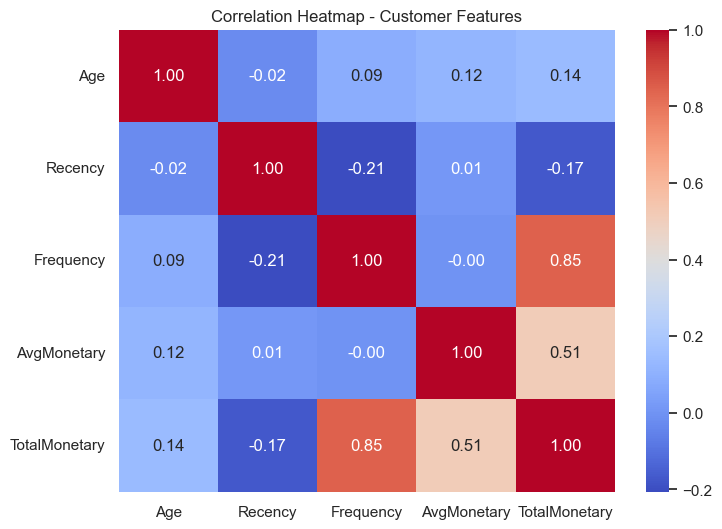

In [10]:
#plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Customer Features")
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

**Distribution Plots (Histograms/KDEs)**

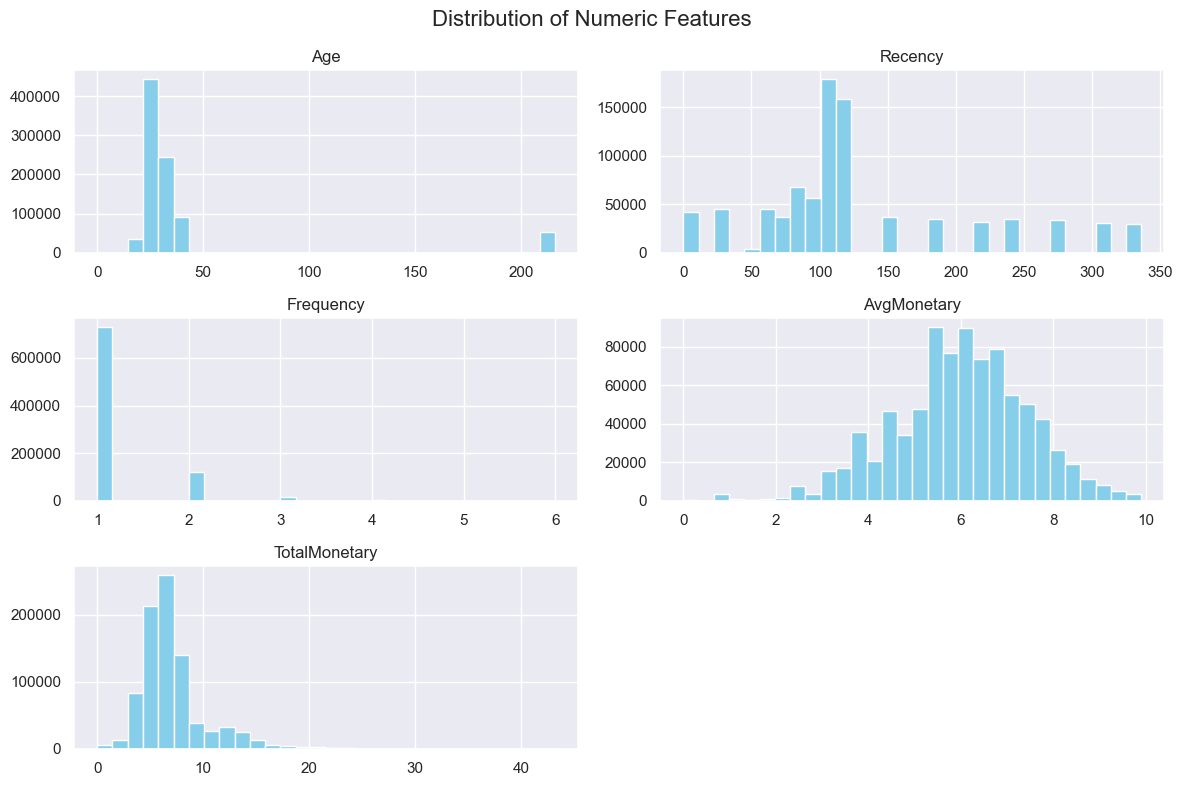

In [12]:
#plot histogram for all numeric columns
customer_features[numeric_cols].hist(bins=30, figsize=(12, 8), color='skyblue')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

**Handle the outlier in Age**

<Axes: xlabel='Age', ylabel='Density'>

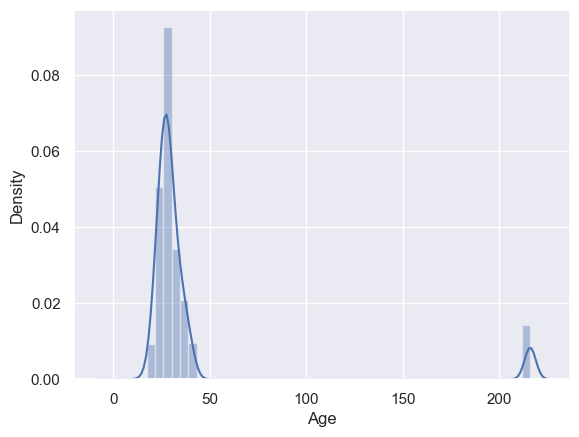

In [14]:
#before removing outliers
sns.distplot(customer_features['Age'])

In [15]:
#remove outliers
q = customer_features['Age'].quantile(0.99)
customer_features1 = customer_features[customer_features['Age']<q]

<Axes: xlabel='Age', ylabel='Density'>

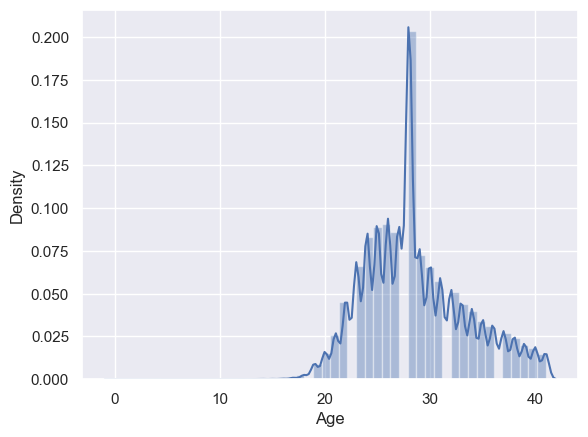

In [16]:
#after removing outliers in average_funded
sns.distplot(customer_features1['Age'])

**Re-plot the distribution after handling the outlier**

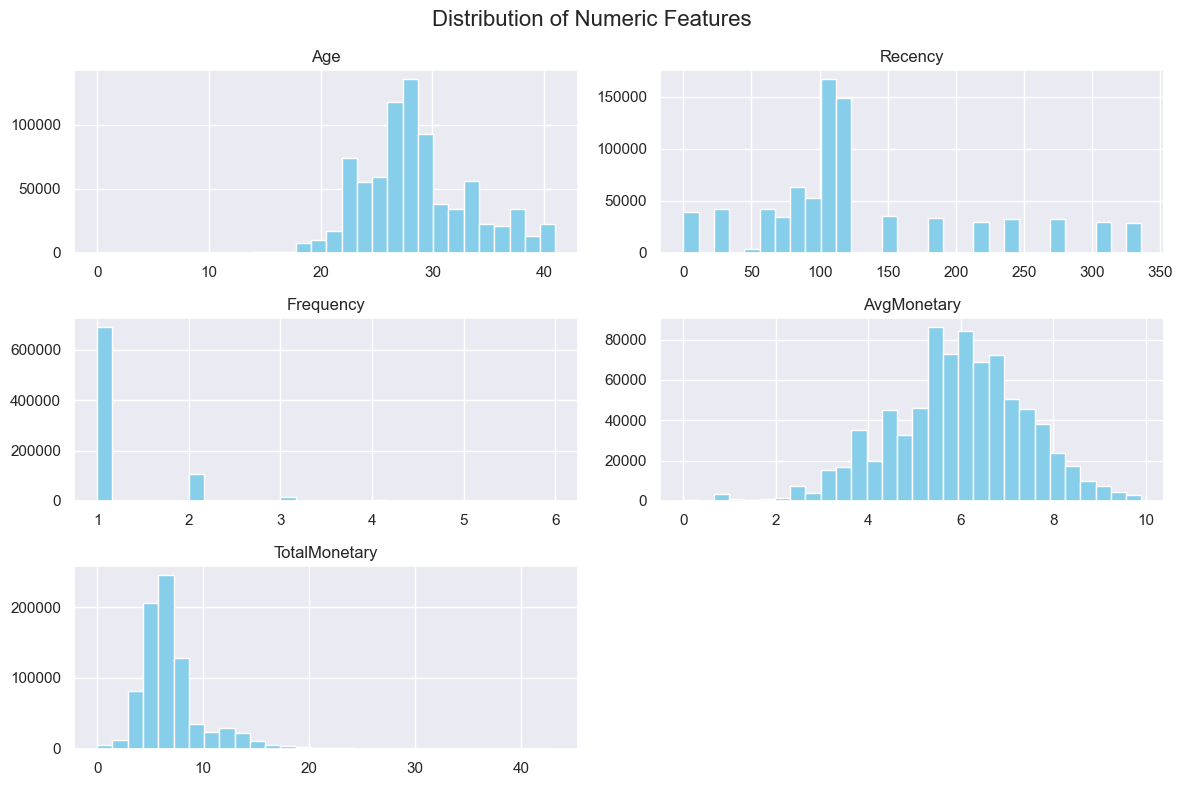

In [18]:
#plot histogram for all numeric columns
customer_features1[numeric_cols].hist(bins=30, figsize=(12, 8), color='skyblue')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.savefig('distribution_of_numeric_features.png', dpi=300, bbox_inches='tight')
plt.show()

**KDE**

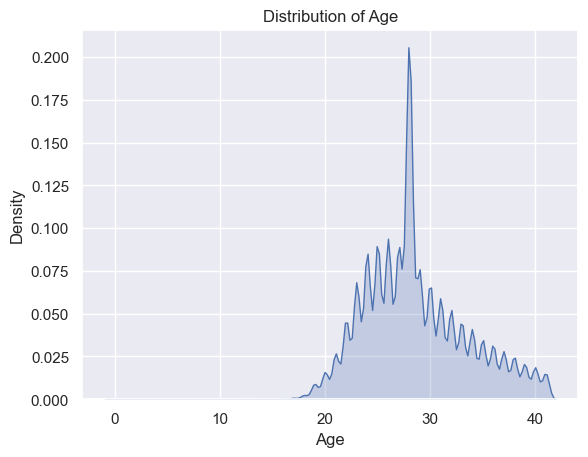

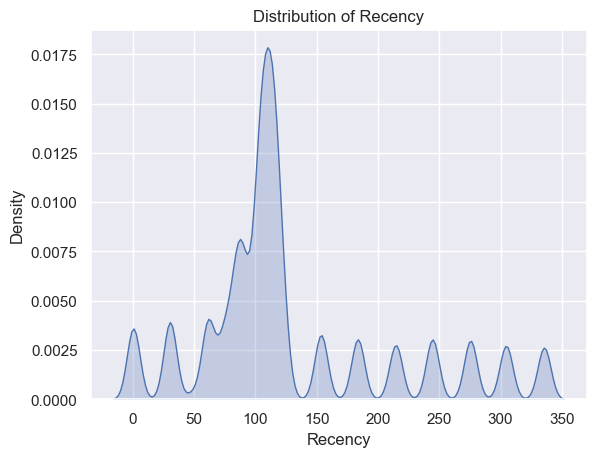

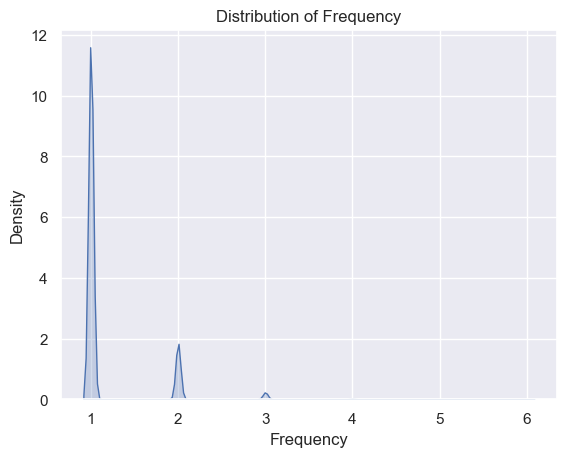

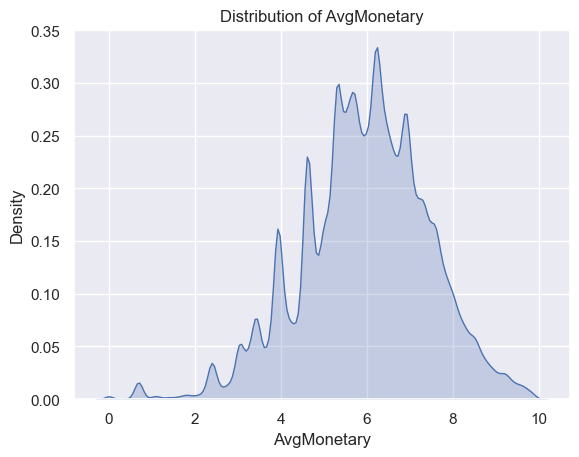

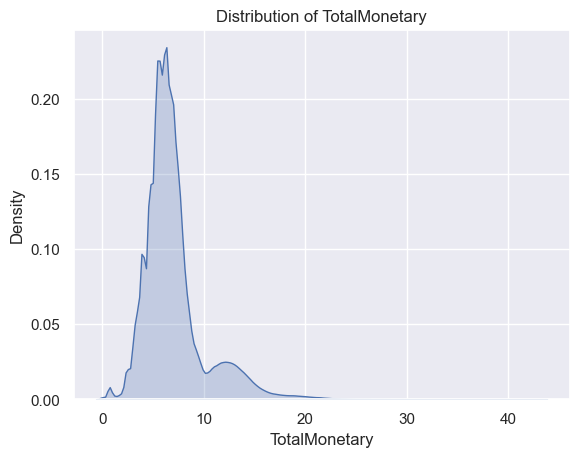

In [20]:
for col in numeric_cols:
    sns.kdeplot(data=customer_features1, x=col, fill=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

**Bar Plots: Gender and Location Distribution**

**Gender Distribution**

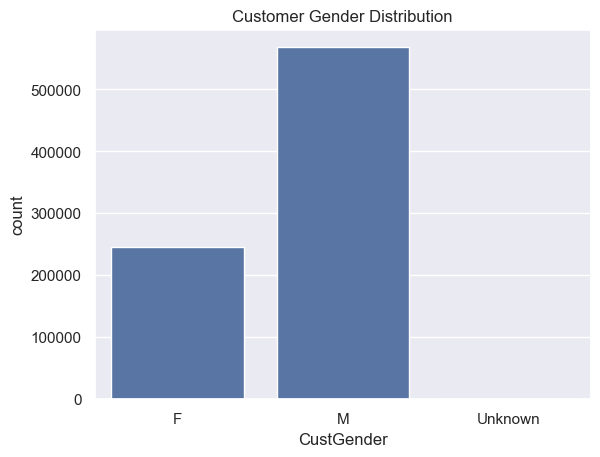

In [23]:
sns.countplot(x='CustGender', data=customer_features1)
plt.title("Customer Gender Distribution")
plt.savefig('customer_gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

**Top locations by Customer Count**

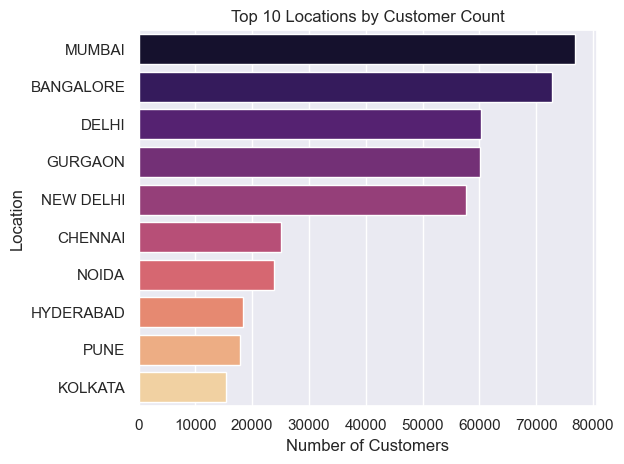

In [30]:
top_locations = customer_features1['CustLocation'].value_counts().nlargest(10)

sns.barplot(x=top_locations.values, y=top_locations.index, palette='magma')
plt.title("Top 10 Locations by Customer Count")
plt.xlabel("Number of Customers")
plt.ylabel("Location")
plt.tight_layout()
plt.savefig('top_10_locations_by_customer_count.png', dpi=300, bbox_inches='tight')
plt.show()

**Box Plots: Metric by Gender/Location**

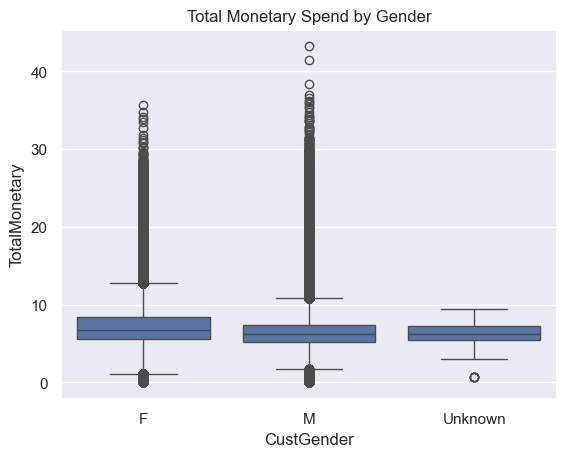

In [32]:
# Example: TotalMonetary by Gender
sns.boxplot(x='CustGender', y='TotalMonetary', data=customer_features1)
plt.title("Total Monetary Spend by Gender")
plt.savefig('total_monetary_spend_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
customer_features1

In [ ]:
#customer_features1.to_csv('customer_features1.csv', index=False)